# Laser Pulses

To simplify the use of laser pulses in ZPIC simulations, the code includes the ability to launch laser pulses. The code allows the user to choose the frequency, amplitude, temporal envelope and polarization of the laser pulse, and will calculate the self-consistent electric and magnetic fields:

* The laser pulses are created at once: the full laser fields are super-imposed (added) on the simulation fields.
* The temporal envelope of the laser pulses is defined as a $\sin^2$ function; different durations for the rising and falling edges may be specified, and the user may also specify an interval where the laser pulse holds its intensity constant.
* All laser pulses propagate along the positive direction of the $x$ axis. Other directions are not currently supported.

## 1D Laser Pulses

To add a laser pulse to a simulation object `sim` we use the `add_laser()` method providing the laser pulse parameters as a `zpic.Laser` object, e.g.:

```python
sim = zpic.Simulation( nx, box, dt, species = electrons )
sim.add_laser( zpic.Laser( start = 17.0, fwhm = 2.0, a0 = 1.0, omega0 = 10.0 ))
```

In 1D the `zpic.Laser` class constructor accepts the following parameters:
* `fwhm` - Full width at half-max of the laser pulse. If set it overrides the `rise`, `flat`, and `fall` parameters;
* `rise`, `flat`, `fall` - Rise time (`rise`), flat time (`flat`) and fall time (`fall`) of the temporal envelope;
* `start` - Position of the starting point (right) of the laser pulse;
* `a0` - Normalized vector potential value at peak intensity of the laser pulse;
* `omega0` - Laser frequency in simulation units;
* `polarization` - Laser polarization in radians measured in reference to the $ y $ direction.

The following example adds a luser pulse starting at position $x = 17 \, \mathrm{c}/\omega_p$, duration $ \Delta t_{\mathrm{FWHM}} = 4 \, \omega_p ^{-1}$, amplitude $a_0 = 1$, frequency $\omega_0 = 10 \, \omega_p$, polarized along the $z$ direction:

In [1]:
# Add zpic library to path
import sys
sys.path.append("../../lib")

import em1d
import numpy as np

# Time step
dt = 0.019

# Number of cells
nx  = 1000

# Simulation box size
box = 20.0

# Initialize simulation
sim = em1d.Simulation( nx, box, dt )

# Add laser pulse
sim.add_laser( em1d.Laser( start = 17.0, fwhm = 4.0, a0 = 1.0, omega0 = 10.0,
               polarization = np.pi/2 ))

To show the laser pulse propagating we will let the simulation run up to $t = 20 \, \omega_p^{-1}$. We will be using a "moving window", which means that the simulation box will be shifted right at the speed of light, following the propagation of the laser pulse:

In [2]:
# Set moving window
sim.set_moving_window()

# Run the simulation
sim.run( 20.0 )


Running simulation up to t = 20 ...
n = 1053, t = 20.007
Done.


The code initializes the laser pulse and propagates it along the positive direction of the $x$ axis:

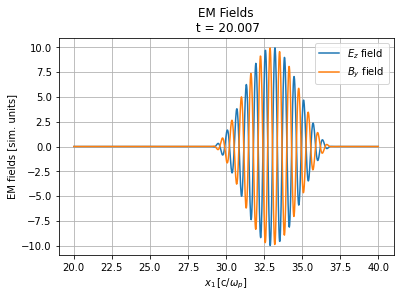

In [3]:
import matplotlib.pyplot as plt

# Plot field values at the center of the cells
xmin = sim.dx/2 + sim.t
xmax = sim.box + (sim.n_move - 0.5) * sim.dx

plt.plot(np.linspace(xmin, xmax, num = sim.nx), sim.emf.Ez, label = "$E_z$ field" )
plt.plot(np.linspace(xmin, xmax, num = sim.nx), sim.emf.By, label = "$B_y$ field" )
plt.xlabel("$x_1 \, [\mathrm{c}/\omega_p]$")
plt.ylabel("EM fields [sim. units]")
plt.title("EM Fields\n t = {:g}".format(sim.t))
plt.grid(True)

plt.legend()
plt.show()

## 2D Laser Pulses

Using laser pulses in 2D simulations works the same way as in 1D, but the `zpic.Laser` class also allows for Gaussian laser pulses. Besides the parameters available in 1D, the `zpic.Laser` class constructor in 2D also accepts the following parameters:
* `type` - Specifies the laser pulse type, plane wave ("plane", the default) or Gaussian pulse ("gaussian")
* `W0` - Gaussian pulse waist size in simulation units
* `focus` - Position of focal plane for Gaussian pulse in simulation units, may be set outside of the simulation box
* `axis` - $y$ position of the propagation axis for Gaussian pulses in simulation units

In [4]:
import em2d
import numpy as np

dt = 0.014
tmax = 22.0

#Simulation box
nx  = [ 1000, 128 ]
box = [ 20.0, 25.6 ]

# Initialize simulation
sim = em2d.Simulation( nx, box, dt )

# Add laser pulse
sim.add_laser( em2d.Laser( type = "gaussian", start = 17.0, fwhm = 2.0, a0 = 1.0, omega0 = 10.0, 
                           W0 = 4.0, focus = 20.0, axis = 12.8, polarization = np.pi/2 ))

The code initializes the laser pulse and propagates it along the positive direction of the $x$ axis:


Running simulation up to t = 20 ...
n = 1429, t = 20.006
Done.


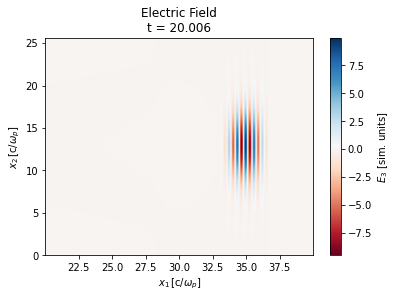

In [5]:
# Set moving window and run up to t = 20
sim.set_moving_window()
sim.run( 20.0 )

# Plot the laser electric field
range = [[sim.t,sim.box[0]+sim.n_move * sim.dx[0]],[0,sim.box[1]]]

plt.imshow( sim.emf.Ez, interpolation = 'bilinear', origin = 'lower',
        extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
        aspect = 'auto', cmap = 'RdBu')

plt.colorbar().set_label('$E_3$ [sim. units]')
plt.xlabel("$x_1 \, [\mathrm{c}/\omega_p]$")
plt.ylabel("$x_2 \, [\mathrm{c}/\omega_p]$")
plt.title("Electric Field\nt = {:g}".format(sim.t))

plt.show()